In [232]:
# EXAMINE LENGTH OF MELODIC PHRASES
# EXAMINE LENGTH IN RELATION TO STARTING MEASURE

In [233]:
import pandas as pd
import numpy as np
from IPython.display import Image
from IPython.core.display import HTML
from IPython.core.display import Image 
from IPython.display import display, HTML
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.mpl_style', 'default')
pd.set_option('display.notebook_repr_html', True)
import data_methods
import warnings
warnings.filterwarnings("ignore")
def _repr_latex_(self):
    return self.to_latex()
pd.DataFrame._repr_latex_ = _repr_latex_  

from music21 import *

%matplotlib inline
%pylab inline
plt.style.use('ggplot')

plt.rcParams["font.family"] = "arial"

Populating the interactive namespace from numpy and matplotlib


In [234]:
all_melodies = pd.read_pickle('./data_frames/all_melodies_frame')
all_notes = pd.read_pickle('base_dataset')

In [235]:
# Explore how many phrases in a given solo, and we can also measure, phrase length, no real correlation here
num_bars = all_notes.groupby(['Performer collection', 'Title', 'Current measure']).count()["Composer name"].reset_index().groupby(['Performer collection', 'Title']).count().reset_index()
del num_bars["Composer name"]
num_bars = num_bars.rename(columns={'Current measure':"Number of measures"})
num_bars['merge_col'] = num_bars["Performer collection"] + num_bars['Title']
# it is possible, how many seperate melodides in each solo. Does not reval much. 
num_melodies = all_melodies.groupby(['Title', 'Performer collection']).count()['Phrase midi numbers'].to_frame().reset_index()
num_melodies = num_melodies.rename(columns = {'Phrase midi numbers':'Number of melodic phrases in this solo'})
num_melodies['merge_col'] = num_melodies["Performer collection"] + num_melodies['Title']
mel_count_with_measure_count = num_bars.merge(num_melodies, how="left", on="merge_col")
mel_count_with_measure_count = mel_count_with_measure_count[['Performer collection_x', 'Title_x', 'Number of measures', 'Number of melodic phrases in this solo']]
mel_count_with_measure_count = mel_count_with_measure_count.rename(columns={'Title_x': "Title", "Performer collection_x": "Performer collection"})
mel_count_with_measure_count["Number of phrases per measure"] = mel_count_with_measure_count['Number of melodic phrases in this solo'] / mel_count_with_measure_count ['Number of measures']
mel_count_with_measure_count

,Performer collection,Title,Number of measures,Number of melodic phrases in this solo,Number of phrases per measure
0,"Keith Jarrett At The Blue Note, The Complete Recordings (Vol. 3)",Days Of Wine And Roses,163,51,0.312883
1,Standards Live,Stella By Starlight,161,78,0.484472
2,"Standards, Vol. 1",All The Things You Are,290,121,0.417241
3,"Standards, Vol. 2",In Love In Vain,131,47,0.358779
4,Still Live,Autumn Leaves,276,137,0.496377
5,Still Live,My Funny Valentine,111,79,0.711712
6,Tokyo 96,Autumn Leaves,171,55,0.321637
7,Up For It,If I Were A Bell,227,91,0.400881
8,Up For It,Someday My Prince Will Come,290,83,0.286207
9,Whisper Not,Groovin High,290,71,0.244828


In [236]:
#Phrasse length is a way of creating variety, and does not correlate into these solos. Tempo, length, does not appear to 
# have a relatinoship

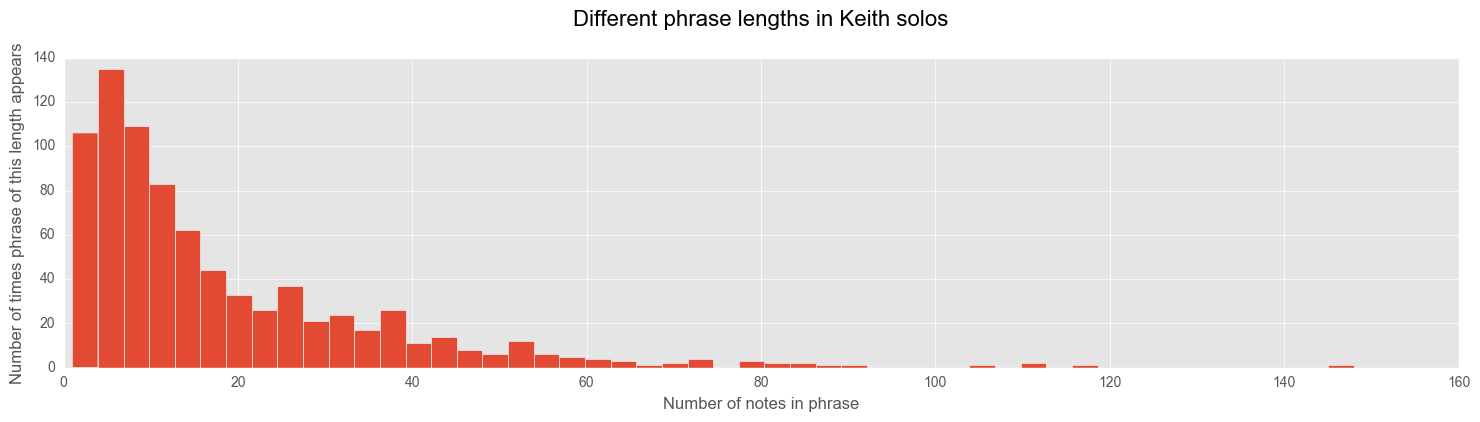

In [237]:
#There is however,  preferred phrase length, long tail that can be seen below. 
ax  = all_melodies["Number of notes in phrase"].hist(bins=50, figsize=(18,4))
ax.set_xlabel("Number of notes in phrase")
ax.set_ylabel("Number of times phrase of this length appears")
ax.set_title("Different phrase lengths in Keith solos", fontsize=16, y=1.08)

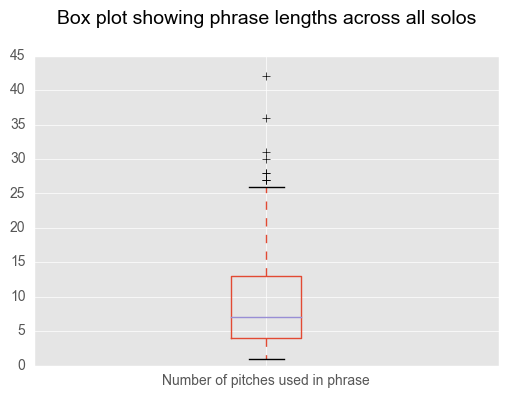

In [238]:
# A more nuanced view is below which shows that mostly, phrases are short, occasionally however, there are very long phrases
ax = all_melodies["Number of pitches used in phrase"].plot(kind="box")
ax.set_title("Box plot showing phrase lengths across all solos", fontsize=14, y=1.08)

In [239]:
#NUMBER OF NOTES IN KJ SOLOS
all_melodies["Number of notes in phrase"].describe().to_frame()

,Number of notes in phrase
count,813.000000
mean,18.055351
std,18.370118
min,1.000000
25%,6.000000
50%,12.000000
75%,25.000000
max,148.000000


In [240]:
#Number of notes in phrase, reasonably small phrases, as oppposed to next table which has high number of notes
# We can look at the top ten and which shows phrase lengths, all small. Interestingly, the top notes sorted by Number of 
# notes in prhase, show, that all the notes except 12. Again provides powerful way to 
# examine the different approaches for jazz musicians, 
sorted_phrase_lengths = all_melodies['Number of notes in phrase'].value_counts().to_frame().sort_values(by="Number of notes in phrase", 
                                                                                ascending=False).reset_index()[0:10]
sorted_phrase_lengths = sorted_phrase_lengths.rename(columns={'index': 'Number of notes in Phrase',
                                     'Number of notes in phrase': 'Number of occurences'})

sorted_phrase_lengths.sort_values("Number of notes in Phrase")

,Number of notes in Phrase,Number of occurences
5,1,33
2,2,43
9,3,30
0,4,57
3,5,39
4,6,39
1,7,43
6,8,33
7,9,33
8,12,31


In [241]:
# Last 10 only accor once, all high numbers, and finally the solo of 148 note phrase. 
sorted_phrase_lengths = all_melodies['Number of notes in phrase'].value_counts().to_frame().sort_values(by="Number of notes in phrase", 
                                                                                ascending=False).reset_index()[-10:]
sorted_phrase_lengths = sorted_phrase_lengths.rename(columns={'index': 'Number of notes in Phrase',
                                     'Number of notes in phrase': 'Number of occurences'})
sorted_phrase_lengths.sort_values("Number of notes in Phrase")

,Number of notes in Phrase,Number of occurences
67,55,1
66,73,1
74,83,1
69,87,1
70,91,1
71,106,1
72,111,1
73,112,1
68,117,1
75,148,1


In [242]:
# LONGEST PHRASE IN KJ
all_melodies[all_melodies["Number of notes in phrase"] == 148][["Title", 'Measure in which phrase begins']]

,Title,Measure in which phrase begins
284,In Love In Vain,95


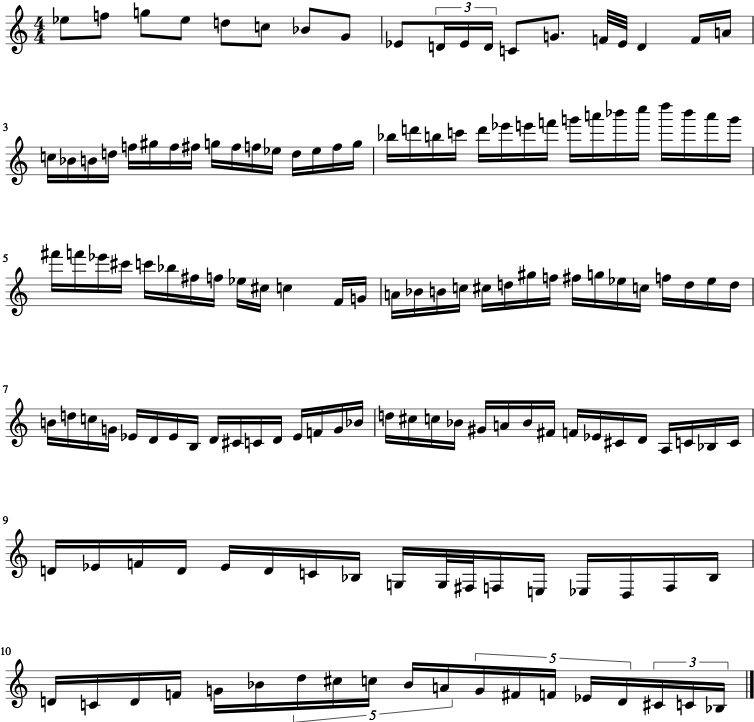

In [243]:
#This longeest melody, there is some arbitrary here. In bar 5, if that quarter note had been interpreted
# as a quarter note and rest this would be broken up into two phrases. 
# phrase length in jazz is problematic
x = all_melodies[all_melodies["Number of notes in phrase"] == 148]["Phrase with rhythm render data"].values[0]
x.timeSignature = meter.TimeSignature('4/4')
x.show()

In [244]:
#PHRASE LENGTHS OF INDIVIDUAL SOLOS

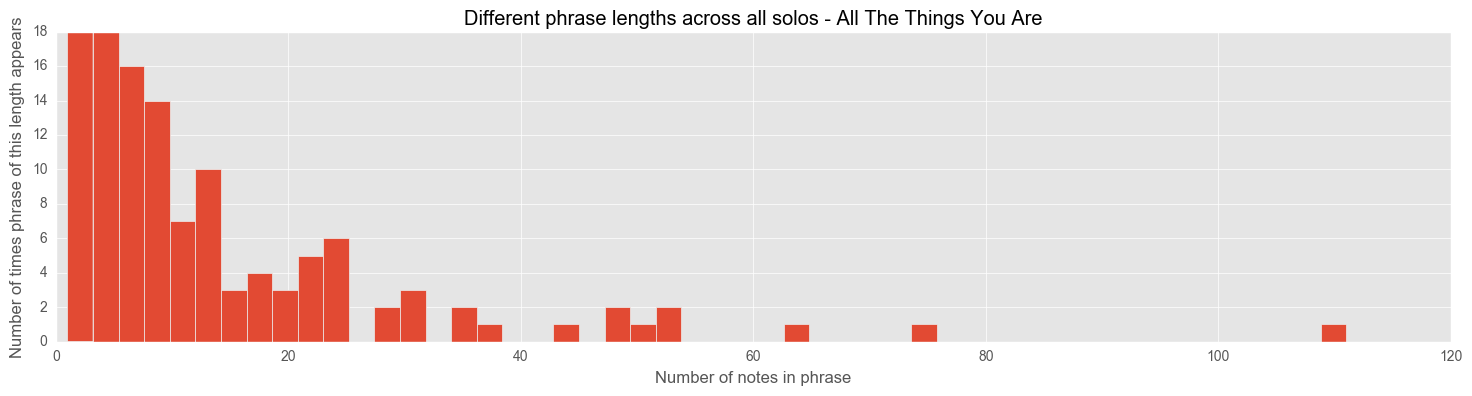

In [245]:
# Individual solos don't yield much, ALL the things and Groovin are also quite similiar
# Inference is that this may be better against other genres, long phrases are outliers
ax = all_melodies[(all_melodies['Title'] == 'All The Things You Are')]
ax = ax["Number of notes in phrase"].hist(bins=50, figsize=(18,4))
ax.set_xlabel("Number of notes in phrase")
ax.set_ylabel("Number of times phrase of this length appears")
ax.set_title("Different phrase lengths across all solos - All The Things You Are")

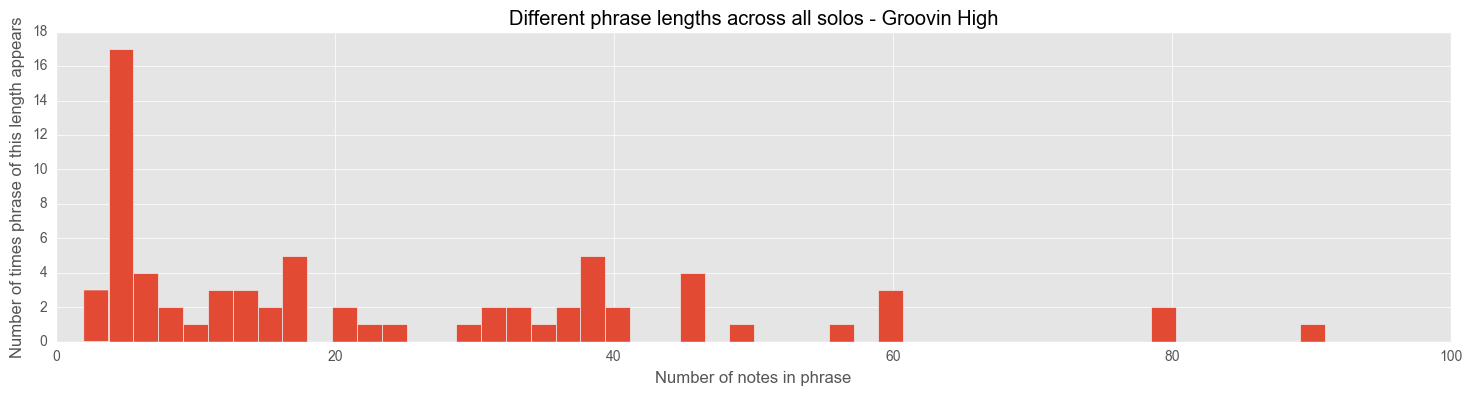

In [246]:
ax = all_melodies[(all_melodies['Title'] == 'Groovin High')]
ax = ax["Number of notes in phrase"].hist(bins=50, figsize=(18,4))
ax.set_xlabel("Number of notes in phrase")
ax.set_ylabel("Number of times phrase of this length appears")
ax.set_title("Different phrase lengths across all solos - Groovin High")

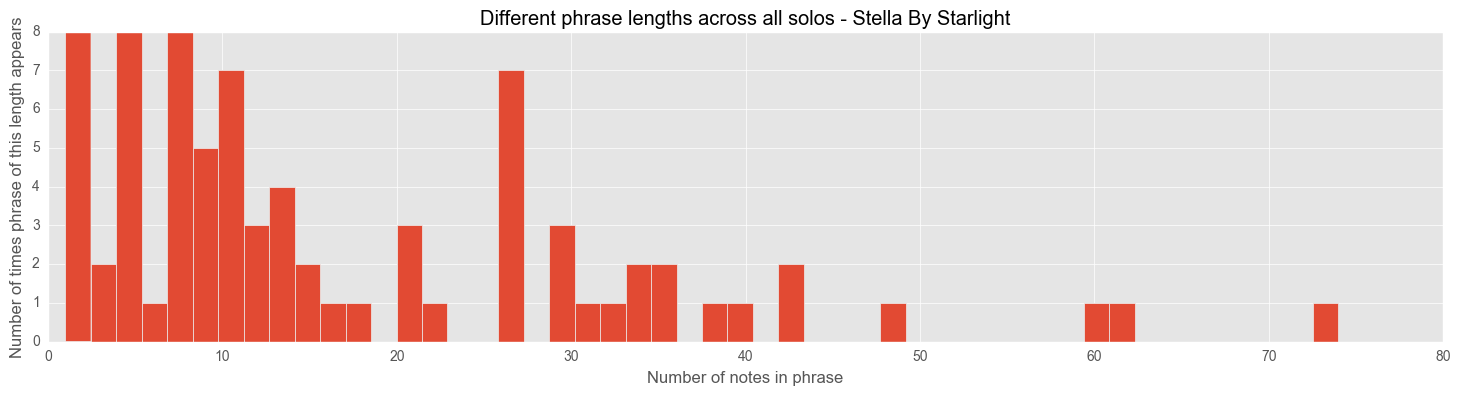

In [247]:
ax = all_melodies[(all_melodies['Title'] == 'Stella By Starlight')]
ax = ax["Number of notes in phrase"].hist(bins=50, figsize=(18,4))
ax.set_xlabel("Number of notes in phrase")
ax.set_ylabel("Number of times phrase of this length appears")
ax.set_title("Different phrase lengths across all solos - Stella By Starlight")

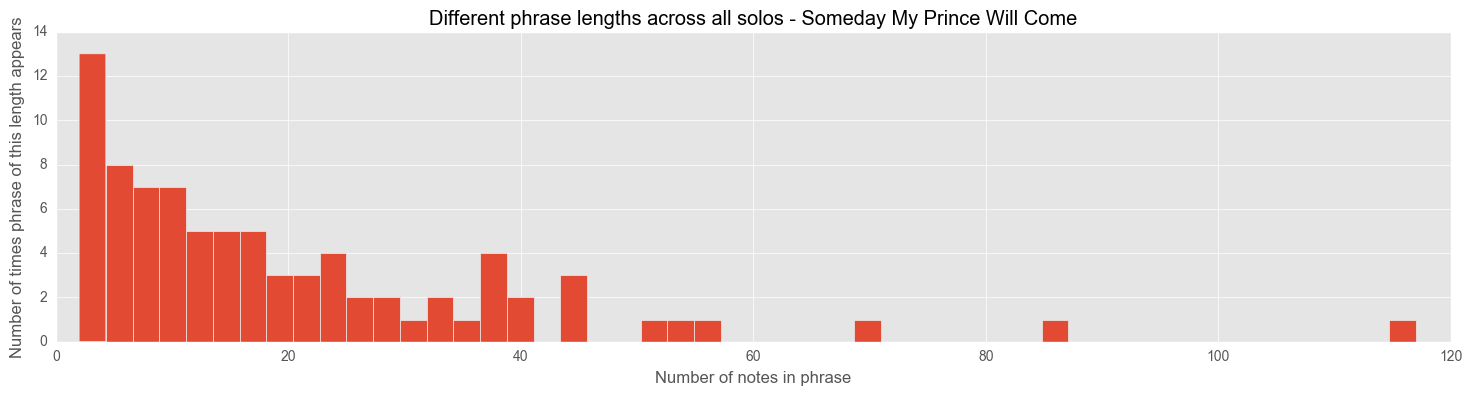

In [248]:
ax = all_melodies[(all_melodies['Title'] == 'Someday My Prince Will Come')]
ax = ax["Number of notes in phrase"].hist(bins=50, figsize=(18,4))
ax.set_xlabel("Number of notes in phrase")
ax.set_ylabel("Number of times phrase of this length appears")
ax.set_title("Different phrase lengths across all solos - Someday My Prince Will Come")

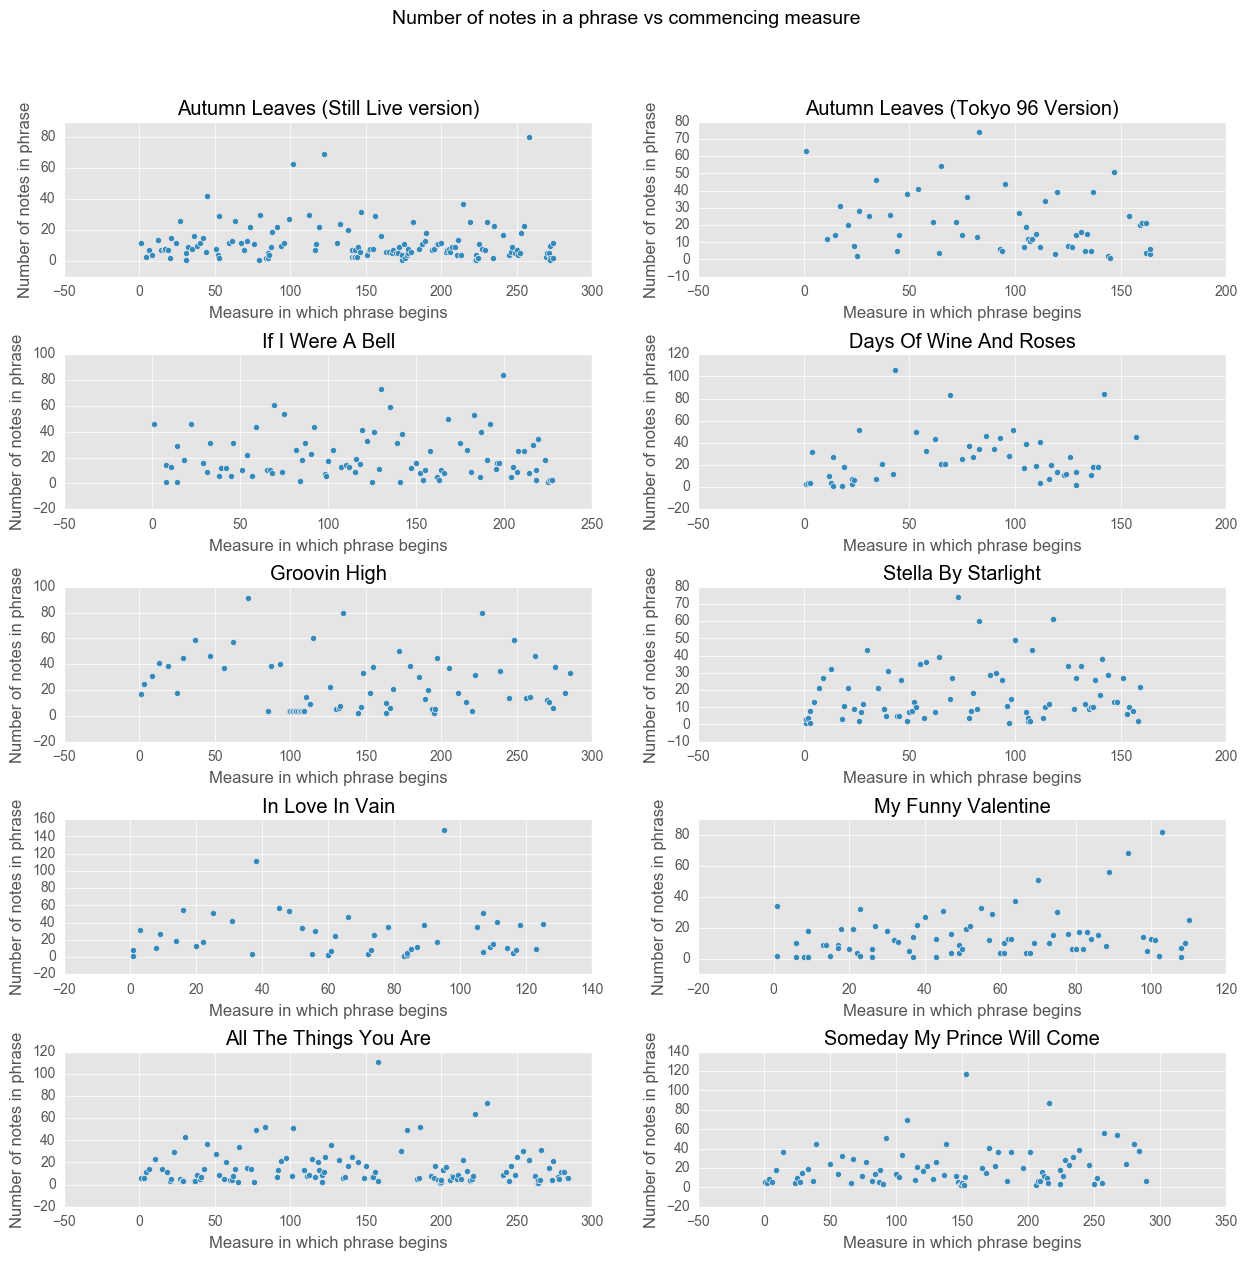

In [249]:
# Do phrases become longer during the course of a solo. Are long intricate melodies in play towards the 
# end. Not the case overly, there is a slight tendancy, but what this really shows
# variety of length is a critical way to gain variety throughout a solo, originality
# repetition is confounded. 
fig, axes = plt.subplots(nrows=5, ncols=2)
fig.set_figheight(14)
fig.set_figwidth(15)

fig.suptitle('Number of notes in a phrase vs commencing measure', fontsize=14)

ax = all_melodies[(all_melodies['Title'] == 'Autumn Leaves') & (all_melodies['Performer collection'] == 'Still Live')].plot(kind='scatter', x='Measure in which phrase begins', y='Number of notes in phrase', ax=axes[0,0])
axes[0,0].set_title('Autumn Leaves (Still Live version)')
axes[0,0].set_xlabel("Measure in which phrase begins")
axes[0,0].set_ylabel("Number of notes in phrase")

ax = all_melodies[(all_melodies['Title'] == 'Autumn Leaves') & (all_melodies['Performer collection'] == 'Tokyo 96')].plot(kind='scatter', x='Measure in which phrase begins', y='Number of notes in phrase', ax=axes[0,1])
axes[0,1].set_title('Autumn Leaves (Tokyo 96 Version)')
axes[0,1].set_xlabel("Measure in which phrase begins")
axes[0,1].set_ylabel("Number of notes in phrase")

ax = all_melodies[(all_melodies['Title'] == 'If I Were A Bell')].plot(kind='scatter', x='Measure in which phrase begins', y='Number of notes in phrase', ax=axes[1,0])
axes[1,0].set_title('If I Were A Bell')
axes[1,0].set_xlabel("Measure in which phrase begins")
axes[1,0].set_ylabel("Number of notes in phrase")

ax = all_melodies[(all_melodies['Title'] == 'Days Of Wine And Roses')].plot(kind='scatter', x='Measure in which phrase begins', y='Number of notes in phrase', ax=axes[1,1])
axes[1,1].set_title('Days Of Wine And Roses')
axes[1,1].set_xlabel("Measure in which phrase begins")
axes[1,1].set_ylabel("Number of notes in phrase")


ax = all_melodies[(all_melodies['Title'] == 'Groovin High')].plot(kind='scatter', x='Measure in which phrase begins', y='Number of notes in phrase', ax=axes[2,0])
axes[2,0].set_title('Groovin High')
axes[2,0].set_xlabel("Measure in which phrase begins")
axes[2,0].set_ylabel("Number of notes in phrase")

ax = all_melodies[(all_melodies['Title'] == 'Stella By Starlight')].plot(kind='scatter', x='Measure in which phrase begins', y='Number of notes in phrase', ax=axes[2,1])
axes[2,1].set_title('Stella By Starlight')
axes[2,1].set_xlabel("Measure in which phrase begins")
axes[2,1].set_ylabel("Number of notes in phrase")


ax = all_melodies[(all_melodies['Title'] == 'In Love In Vain')].plot(kind='scatter', x='Measure in which phrase begins', y='Number of notes in phrase', ax=axes[3,0])
axes[3,0].set_title('In Love In Vain')
axes[3,0].set_xlabel("Measure in which phrase begins")
axes[3,0].set_ylabel("Number of notes in phrase")


ax = all_melodies[(all_melodies['Title'] == 'My Funny Valentine')].plot(kind='scatter', x='Measure in which phrase begins', y='Number of notes in phrase', ax=axes[3,1])
axes[3,1].set_title('My Funny Valentine')
axes[3,1].set_xlabel("Measure in which phrase begins")
axes[3,1].set_ylabel("Number of notes in phrase")

ax = all_melodies[(all_melodies['Title'] == 'All The Things You Are')].plot(kind='scatter', x='Measure in which phrase begins', y='Number of notes in phrase', ax=axes[4,0])
axes[4,0].set_title('All The Things You Are')
axes[4,0].set_xlabel("Measure in which phrase begins")
axes[4,0].set_ylabel("Number of notes in phrase")

ax = all_melodies[(all_melodies['Title'] == 'Someday My Prince Will Come')].plot(kind='scatter', x='Measure in which phrase begins', y='Number of notes in phrase', ax=axes[4,1])
axes[4,1].set_title('Someday My Prince Will Come')
axes[4,1].set_xlabel("Measure in which phrase begins")
axes[4,1].set_ylabel("Number of notes in phrase")

In [250]:
#WHEN EXAMINING THE TOP 5 LENGTH MELODIES, TEMPO IS A FACTOR HERE, MID TEMPO MANY NOTES, FASTER PASSAGES
very_long_phrases = all_melodies[all_melodies["Number of notes in phrase"] > 85][['Performer collection',
                                                                  'Title',
                                                                  "Measure in which phrase begins",
                                                                  "Measure location in which phrase begins",
                                                                  'Phrase with rhythm render data']]

In [251]:
#Very long phrases, do not appear specifically, jazz improvisation. Don't limited to measure, don't occur on early
# measures, and measures with location phrase begin
very_long_phrases

,Performer collection,Title,Measure in which phrase begins,Measure location in which phrase begins,Phrase with rhythm render data
17,"Keith Jarrett At The Blue Note, The Complete Recordings (Vol. 3)",Days Of Wine And Roses,43,3.500000,<music21.stream.Stream 4732067456>
196,"Standards, Vol. 1",All The Things You Are,158,2.500000,<music21.stream.Stream 4721424032>
262,"Standards, Vol. 2",In Love In Vain,38,1.333333,<music21.stream.Stream 4768955080>
284,"Standards, Vol. 2",In Love In Vain,95,1.500000,<music21.stream.Stream 4769836336>
707,Up For It,Someday My Prince Will Come,153,1.000000,<music21.stream.Stream 4864983672>
724,Up For It,Someday My Prince Will Come,216,2.250000,<music21.stream.Stream 4866728120>
753,Whisper Not,Groovin High,72,3.000000,<music21.stream.Stream 4884095832>


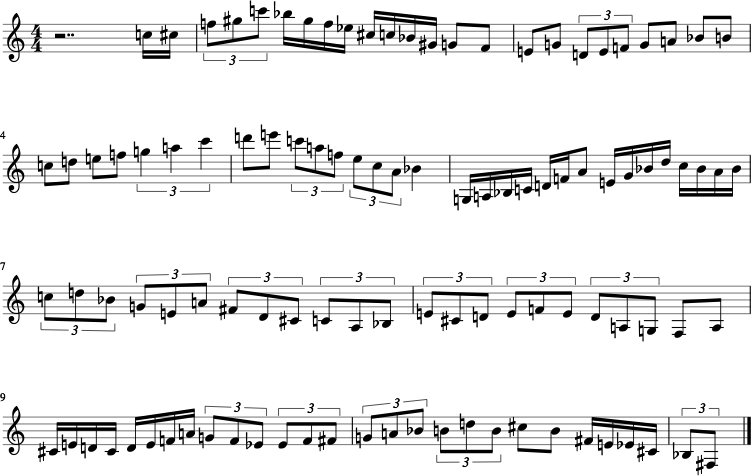

In [260]:
#Longest phrases in Kieth Jarrett's work can be seen here. Quite different, long phrases, is a critical way in which 
# variety, tendency to repetition, is overcome through this ability to 
# start phrases, on different places, differnt lenths, regardless of tempo. Meta data phrase
# is a way in which variety, ability to endlessly vary. We will see repetiion, 
# but here there is little repeition indeed. 
s = stream.Stream()
s.append(note.Rest(quarterLength=3.5))
x = very_long_phrases['Phrase with rhythm render data'].ix[17]
s.append(x)
s.flat.show()

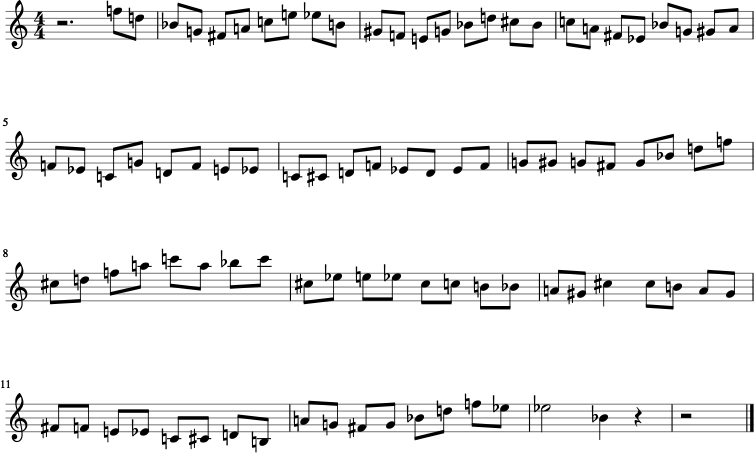

In [258]:
s = stream.Stream()
s.append(note.Rest(quarterLength=3.0))
x = very_long_phrases['Phrase with rhythm render data'].ix[753]
s.append(x)
s.flat.show()